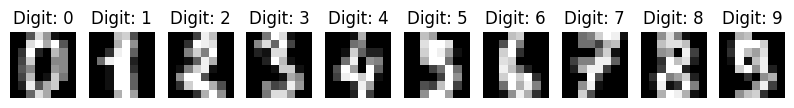

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

#loading in from the sklearn dataset
digits = load_digits();

#scaling the digits so mean is 0 and the variance is 1
scaled_digits = scale(digits.data)

#the ten clases , numbers 
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(10, 3))

for i in range(num_images):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].set_title(f"Digit: {digits.target[i]}")
    axes[i].axis('off')

plt.show()


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#splitting into 33% testing and 67% training , random state 42 ensure reproducibility 
x_test, x_train, y_test, y_train = train_test_split(scaled_digits, digits.target, test_size=.33, random_state=42)

#trainign the svm classifier with rbf radial based function 
svm_classifier = SVC(kernel='rbf', C=100, random_state=42)
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set from the x_test
y_pred = svm_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Accuracy: 0.9584372402327515
Confusion Matrix:
 [[123   0   0   0   0   0   0   0   0   0]
 [  0 125   0   0   1   0   0   0   1   0]
 [  0   0 121   0   2   0   0   1   1   0]
 [  0   0   1 119   1   0   0   2   2   2]
 [  0   0   0   0 112   0   0   1   1   3]
 [  0   0   0   0   0 106   0   0   0   3]
 [  0   4   2   0   4   0 111   0   0   3]
 [  0   0   0   0   3   0   0 114   0   0]
 [  0   3   0   0   1   2   0   0 115   1]
 [  0   0   0   0   0   2   0   1   2 107]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       0.95      0.98      0.97       127
           2       0.98      0.97      0.97       125
           3       1.00      0.94      0.97       127
           4       0.90      0.96      0.93       117
           5       0.96      0.97      0.97       109
           6       1.00      0.90      0.94       124
           7       0.96      0.97      0.97       117
          

Most common mistake: 6 misclassified as 1
Misclassified digits:


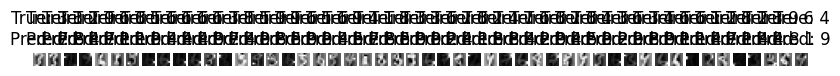

In [28]:
# Find the most common mistake
most_common_mistake = np.argmax(conf_matrix - np.diag(np.diag(conf_matrix)))
most_common_mistake_digit = np.unravel_index(most_common_mistake, conf_matrix.shape)
print(f"Most common mistake: {most_common_mistake_digit[0]} misclassified as {most_common_mistake_digit[1]}")


#plot misclassified digits
misclassified_indices = np.where(y_test != y_pred)[0]
def plot_images(images, true_labels, pred_labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images):
        if i < len(images):
            axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
            axes[i].set_title(f"True: {true_labels[i]}\nPred: {pred_labels[i]}")
            axes[i].axis('off')
    plt.show()

print("Misclassified digits:")
plot_images(x_test[misclassified_indices], y_test[misclassified_indices], y_pred[misclassified_indices], num_images=len(misclassified_indices))


Best C value: 6.040404040404041
Best cross-validated accuracy: 0.9538053234292789


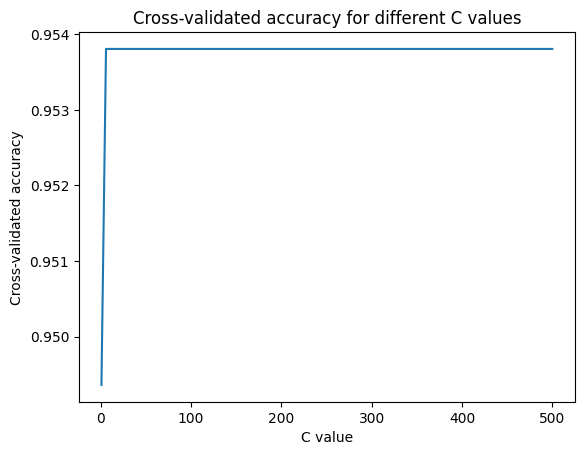

In [29]:
#cross val score function to evaluate accuracy 
C_values = np.linspace(1, 500, 100)
cross_val_scores = []

for C in C_values:
    svm_classifier = SVC(kernel='rbf', C=C, random_state=42)
    scores = cross_val_score(svm_classifier, scaled_digits, digits.target, cv=5)
    cross_val_scores.append(scores.mean())

best_C = C_values[np.argmax(cross_val_scores)]
print("Best C value:", best_C)
print("Best cross-validated accuracy:", max(cross_val_scores))

# Plot the cross-validation results
plt.plot(C_values, cross_val_scores)
plt.xlabel('C value')
plt.ylabel('Cross-validated accuracy')
plt.title('Cross-validated accuracy for different C values')
plt.show()

In [30]:
#testing on raw not scaled data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
svm_classifier_raw = SVC(kernel='rbf', C=100, random_state=42)
svm_classifier_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = svm_classifier_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
print("Accuracy on raw data:", accuracy_raw)

Accuracy on raw data: 0.9861111111111112


### KNN

In [ ]:
from sklearn import neighbors

knn_classifier = KNeighborsClassifier(n_neighbors=10)
#using the training data from before 
knn_classifier.fit(x_train, y_train)


